In [4]:
#   Statistical Thinking in Python (Part 1)
##  Random Number Generator
### Simulating 4 coin filps

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(42)
random_numbers = np.random.random(size=4)
print(random_numbers)

[0.37454012 0.95071431 0.73199394 0.59865848]


In [9]:
heads = random_numbers <0.5
tails = random_numbers >= 0.5
print(heads)
print(tails)

[ True False False False]
[False  True  True  True]


In [11]:
n_all_heads = 0 ## Initialize number of 4-heads trails

In [12]:
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

In [13]:
n_all_heads / 10000

0.0619

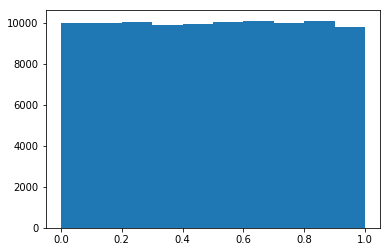

In [16]:
## Program 3.1
# Seed the random number generator
np.random.seed(42)
# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)
# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()
# Plot a histogram
_ = plt.hist(random_numbers)
# Show the plot
plt.show()

In [21]:
## Program 3.2
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0
    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1
    return n_success

In [22]:
perform_bernoulli_trials(4,1)

4

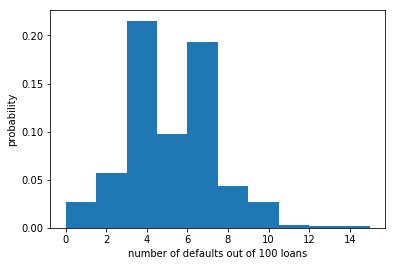

In [26]:
## Program 3.3 - How many defaults might we expect?

# Seed random number generator
np.random.seed(42)
# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)
# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)
# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
# Show the plot
plt.show()

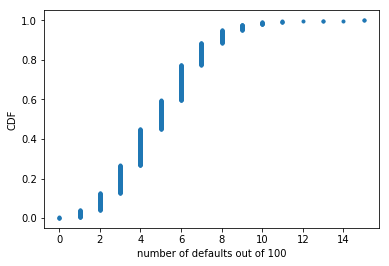

Probability of losing money = 0.022


In [29]:
## Program 3.4
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1,n+1)/ n
    return x, y

# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

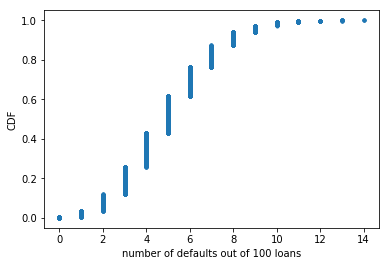

In [30]:
## Program 3.5
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100,0.05,size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

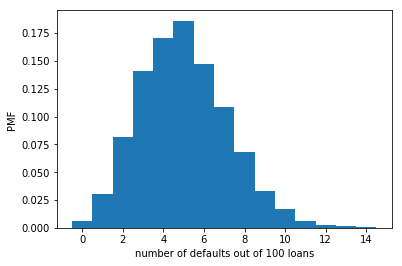

In [31]:
## Program 3.6
# Compute bin edges: bins
bins = np.arange(max(n_defaults) + 1.5) - 0.5
# Generate histogram
_ = plt.hist(n_defaults, normed=True, bins=bins)
# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')
# Show the plot
plt.show()

In [40]:
## Program 3.7
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,size=10000)
# Print the mean and standard deviation
print('Poisson:\n', np.mean(samples_poisson),np.std(samples_poisson))
# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]
# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

# Print results
print('n =', n[i], '\nBinom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:
 10.0395 3.1397356178506497
n = 1000 
Binom: 10.0279 3.1539057674572337


Question: How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Possible Answers
Discrete uniform
Binomial
Poisson
Both Binomial and Poisson, though Poisson is easier to model and compute. (Correct Answer)
Both Binomial and Poisson, though Binomial is easier to model and compute.

When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

In [41]:
## Program 3.8
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(np.mean(251/115),size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = np.sum(n_large)/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0069


Thinking probabilistically-- Continuous variables

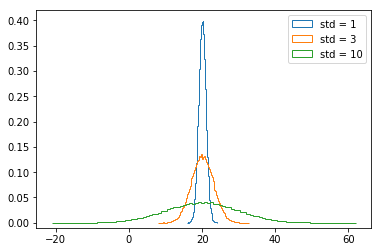

In [42]:
## Program 4.1 - Normal PDF
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20,3,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)

# Make histograms
_ = plt.hist(samples_std1,bins=100,normed=True,histtype='step')
_ = plt.hist(samples_std3,bins=100,normed=True,histtype='step')
_ = plt.hist(samples_std10,bins=100,normed=True,histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

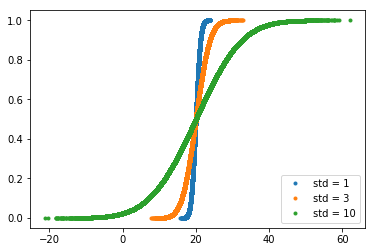

In [43]:
## Program 4.2 - The Normal CDF
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.',linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.',linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.',linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


In [45]:
belmont_no_outliers = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ]

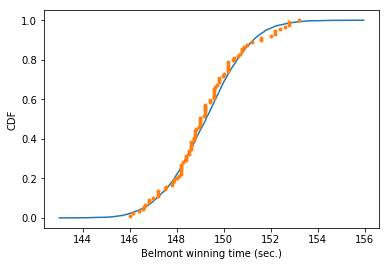

In [48]:
## Program 4.3 - Are the Belmont Stakes results Normally distributed?
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma,size=10000)
# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [49]:
## Program 4.4 - What are the chances of a horse matching or beating Secretariat's record?
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000609


# Program 4.5
If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [52]:
## Program 4.5 
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

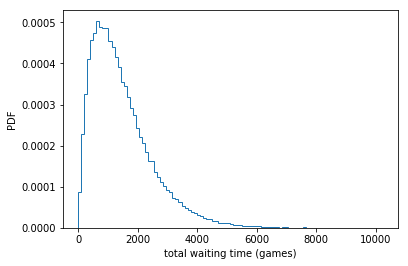

In [51]:
## Program 4.6 
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)
# Make the histogram
_ = plt.hist(waiting_times, bins=100, normed=True, histtype='step')
# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()